# House Prices Prediction

## Import the library

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import os
for dirname, _, filenames in os.walk('C:/Users/qqcom/Downloads/house-prices-advanced-regression-techniques'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/qqcom/Downloads/house-prices-advanced-regression-techniques\data_description.txt
C:/Users/qqcom/Downloads/house-prices-advanced-regression-techniques\SalePrice_hist.png
C:/Users/qqcom/Downloads/house-prices-advanced-regression-techniques\SalePrice_histfig2.png
C:/Users/qqcom/Downloads/house-prices-advanced-regression-techniques\sample_submission.csv
C:/Users/qqcom/Downloads/house-prices-advanced-regression-techniques\test.csv
C:/Users/qqcom/Downloads/house-prices-advanced-regression-techniques\train.csv
C:/Users/qqcom/Downloads/house-prices-advanced-regression-techniques\Train_num_hist.png


## Load the dataset

In [234]:
train = pd.read_csv('C:/Users/qqcom/Downloads/house-prices-advanced-regression-techniques/train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [235]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [236]:
null_num = train.isnull().sum()
null_num

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## SalePrice Distribution

In [237]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

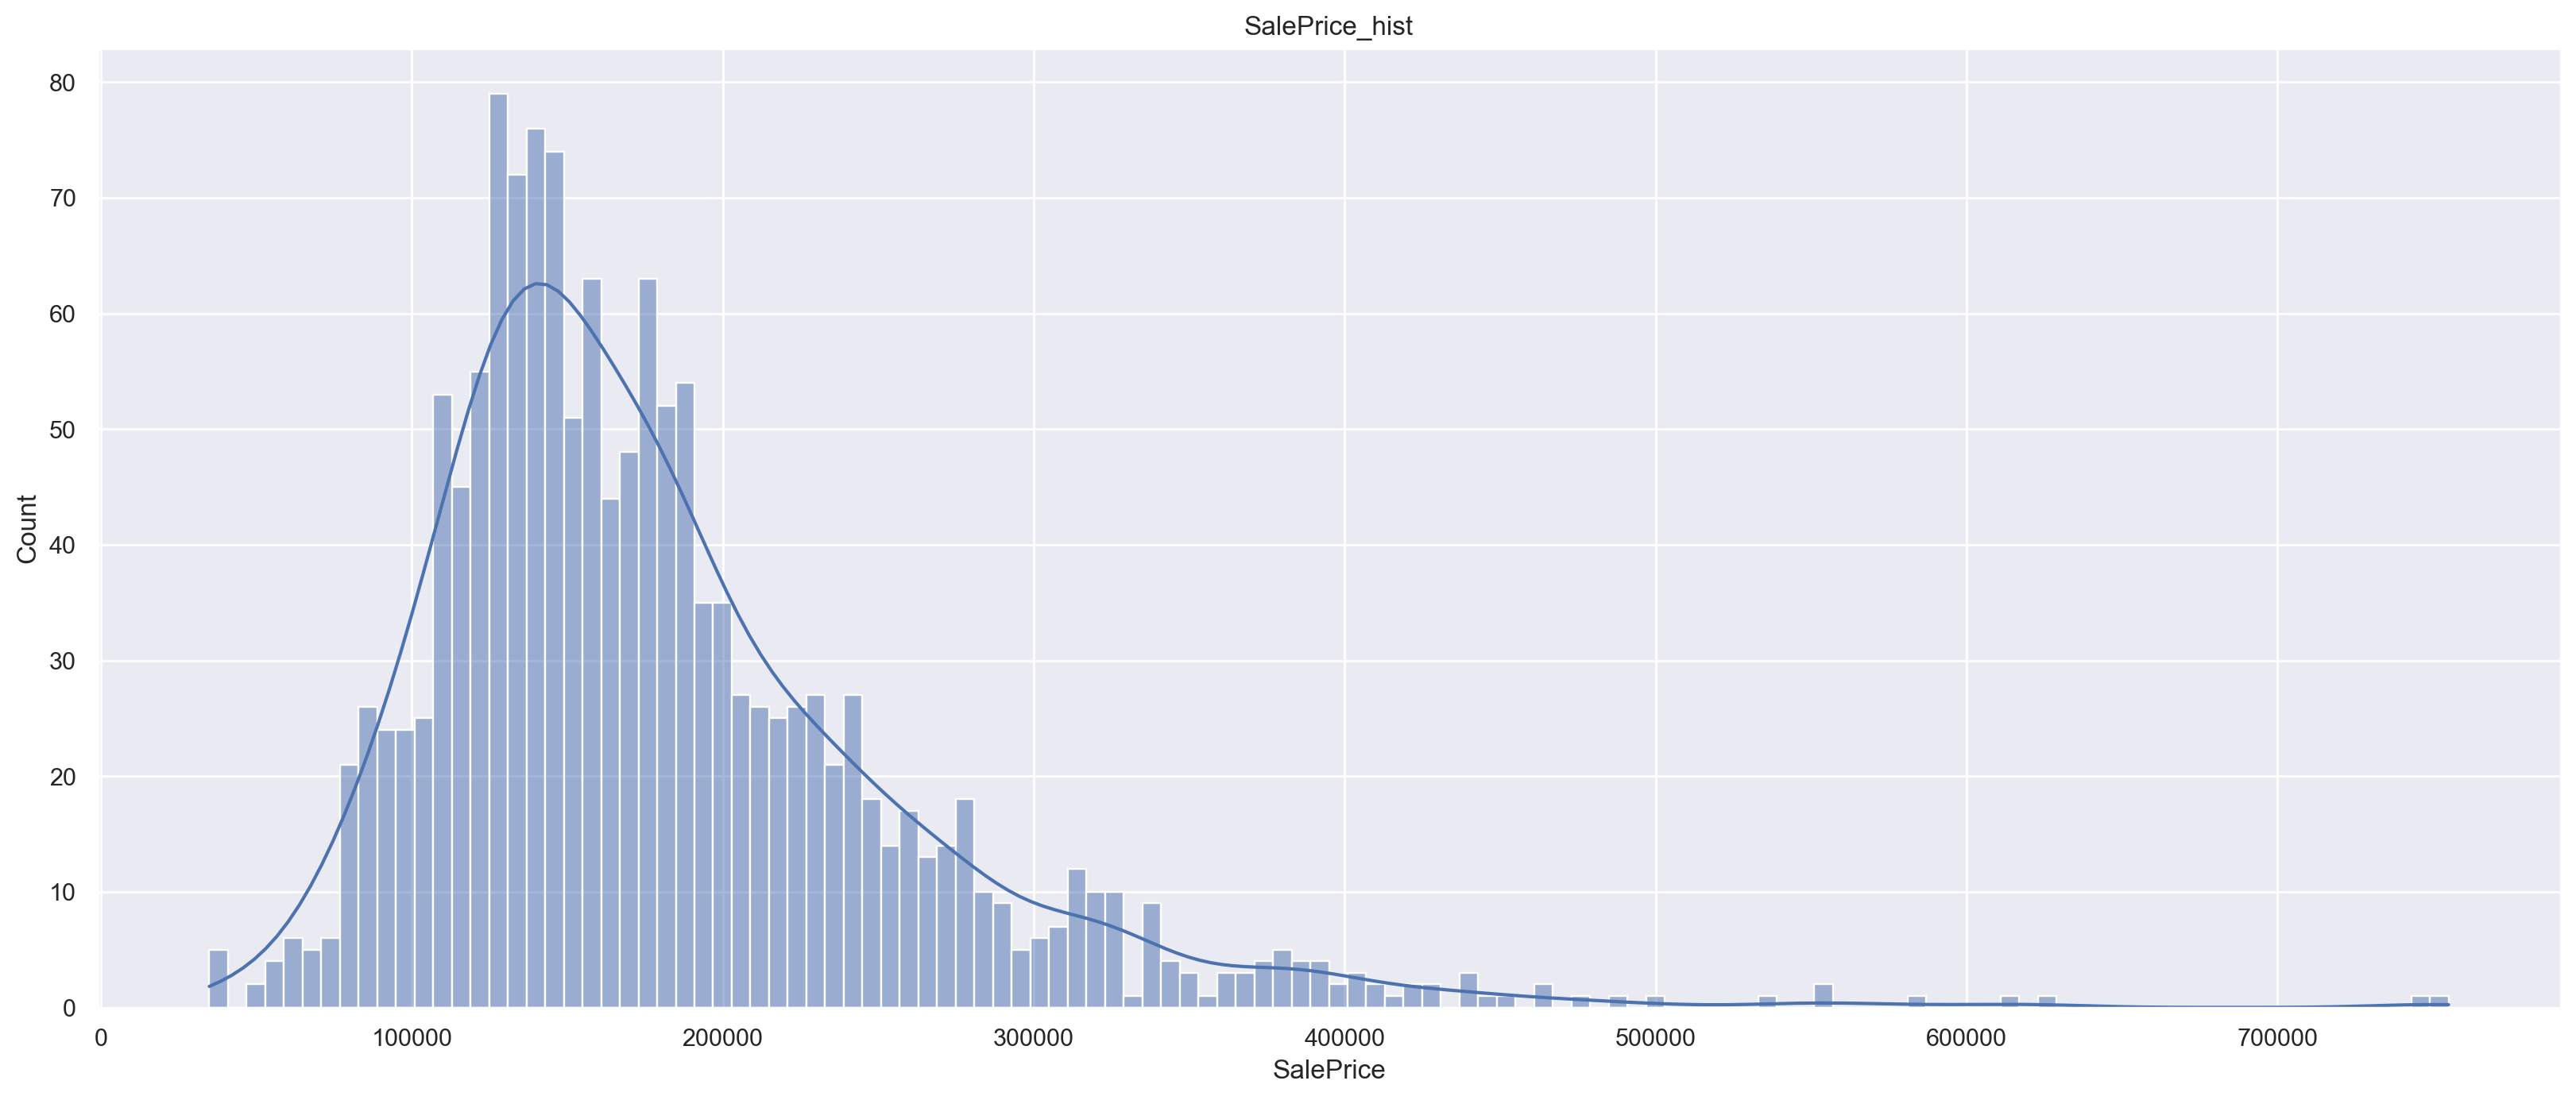

In [238]:
plt.figure(dpi=200, figsize=(20, 8))
sns.set()
SalePrice_hist = sns.histplot(train['SalePrice'], kde=True, bins=120)
SalePrice_hist.set_title('SalePrice_hist')
plt.savefig('C:/Users/qqcom/Downloads/house-prices-advanced-regression-techniques/SalePrice_histfig2')

In [244]:
train = train.drop('Id',axis=1)

## Numerial data distribution

In [279]:
#筛选出数字类型的列
train_num = train.select_dtypes(exclude='object')
train_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [280]:
train_num.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [281]:
train_num = train_num.drop(columns=['LotFrontage','MasVnrArea' ,'GarageYrBlt'],axis=1)
train_num

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


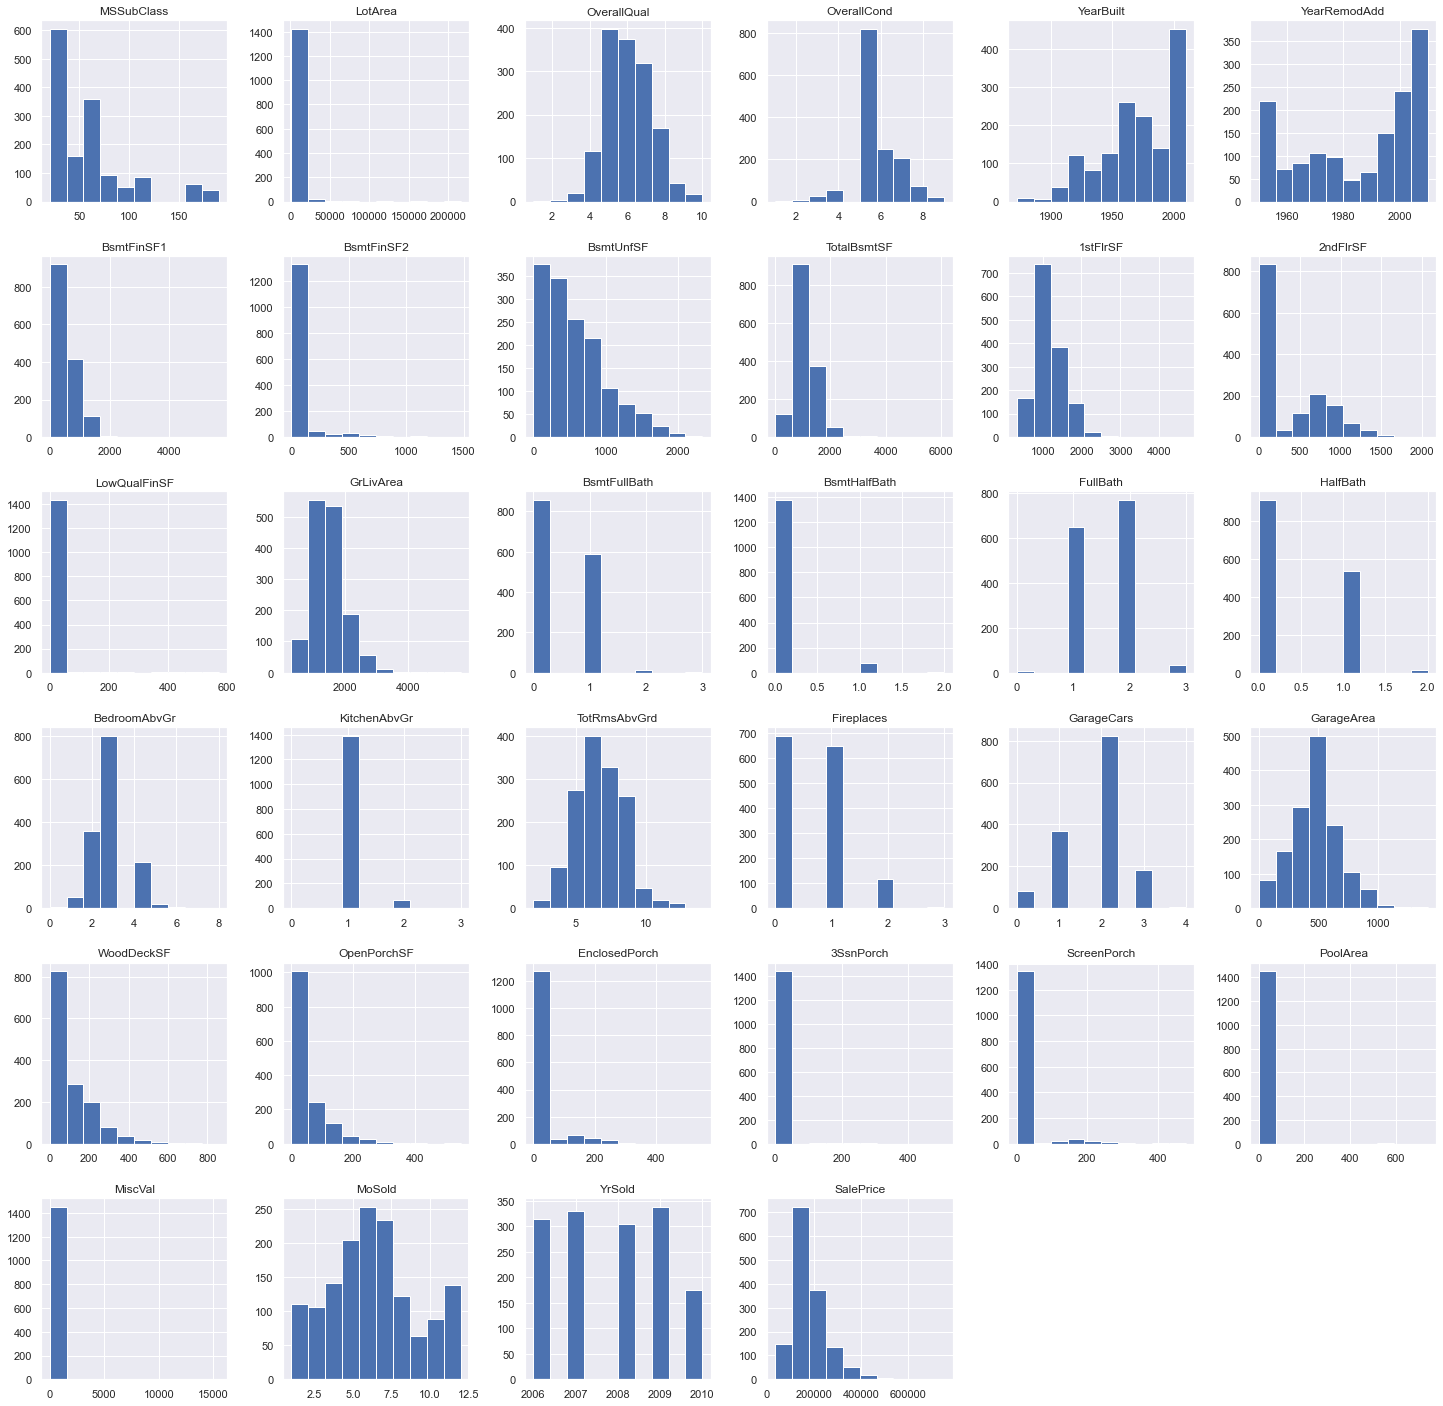

In [282]:
train_num.hist(figsize=(25,25))
plt.savefig('C:/Users/qqcom/Downloads/house-prices-advanced-regression-techniques/Train_num_hist')

## Encode columns of non-numeric types

In [241]:
train_obj = train.select_dtypes(include='object')
train_obj

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [171]:
from sklearn.preprocessing import LabelEncoder

In [172]:
#label_encoder = LabelEncoder()
#train_obj_encoder = train_obj.apply(label_encoder.fit_transform)
#train_obj_encoder

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
1,3,1,2,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,4,8,4
2,3,1,2,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
3,3,1,2,0,3,0,0,0,6,2,...,5,2,4,4,2,3,4,4,8,0
4,3,1,2,0,3,0,2,0,15,2,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,2,3,3,0,4,0,8,2,...,1,1,4,4,2,3,4,4,8,4
1456,3,1,2,3,3,0,4,0,14,2,...,1,2,4,4,2,3,2,4,8,4
1457,3,1,2,3,3,0,4,0,6,2,...,1,1,4,4,2,3,0,2,8,4
1458,3,1,2,3,3,0,4,0,12,2,...,1,2,4,4,2,3,4,4,8,4


### View the mapping relationship

In [296]:
train_obj = train.select_dtypes(include='object')
label_encoder_dict = {}
for col in train_obj.columns:
    label_encoder_temp = LabelEncoder()
    train_obj[col] = label_encoder_temp.fit_transform(train_obj[col])
    unique_list = train_obj[col].unique()
    
    unique_dict = {}
    for v in unique_list:
        unique_dict[v] = label_encoder_temp.inverse_transform(np.array([v]))[0]
    
    label_encoder_dict[col] = unique_dict

C:\Users\qqcom\AppData\Local\Temp/ipykernel_10744/1165607496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_obj[col] = label_encoder_temp.fit_transform(train_obj[col])


In [229]:
for key, value in label_encoder_dict.items():
    print(key, value)

MSZoning {3: 'RL', 4: 'RM', 0: 'C (all)', 1: 'FV', 2: 'RH'}
Street {1: 'Pave', 0: 'Grvl'}
Alley {2: nan, 0: 'Grvl', 1: 'Pave'}
LotShape {3: 'Reg', 0: 'IR1', 1: 'IR2', 2: 'IR3'}
LandContour {3: 'Lvl', 0: 'Bnk', 2: 'Low', 1: 'HLS'}
Utilities {0: 'AllPub', 1: 'NoSeWa'}
LotConfig {4: 'Inside', 2: 'FR2', 0: 'Corner', 1: 'CulDSac', 3: 'FR3'}
LandSlope {0: 'Gtl', 1: 'Mod', 2: 'Sev'}
Neighborhood {5: 'CollgCr', 24: 'Veenker', 6: 'Crawfor', 15: 'NoRidge', 11: 'Mitchel', 21: 'Somerst', 14: 'NWAmes', 17: 'OldTown', 3: 'BrkSide', 19: 'Sawyer', 16: 'NridgHt', 12: 'NAmes', 20: 'SawyerW', 9: 'IDOTRR', 10: 'MeadowV', 7: 'Edwards', 23: 'Timber', 8: 'Gilbert', 22: 'StoneBr', 4: 'ClearCr', 13: 'NPkVill', 0: 'Blmngtn', 2: 'BrDale', 18: 'SWISU', 1: 'Blueste'}
Condition1 {2: 'Norm', 1: 'Feedr', 4: 'PosN', 0: 'Artery', 5: 'RRAe', 8: 'RRNn', 6: 'RRAn', 3: 'PosA', 7: 'RRNe'}
Condition2 {2: 'Norm', 0: 'Artery', 7: 'RRNn', 1: 'Feedr', 4: 'PosN', 3: 'PosA', 6: 'RRAn', 5: 'RRAe'}
BldgType {0: '1Fam', 1: '2fmCon', 

## Prepare the data

In [297]:
train_total = pd.concat([train_num, train_obj], axis=1)
train_total

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,8450,7,5,2003,2003,706,0,150,856,...,1,1,4,4,2,3,4,4,8,4
1,20,9600,6,8,1976,1976,978,0,284,1262,...,1,1,4,4,2,3,4,4,8,4
2,60,11250,7,5,2001,2002,486,0,434,920,...,1,1,4,4,2,3,4,4,8,4
3,70,9550,7,5,1915,1970,216,0,540,756,...,5,2,4,4,2,3,4,4,8,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,1,1,4,4,2,3,4,4,8,4
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,1,2,4,4,2,3,2,4,8,4
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,1,1,4,4,2,3,0,2,8,4
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,1,2,4,4,2,3,4,4,8,4


In [298]:
from sklearn.model_selection import train_test_split

X = train_total.drop('SalePrice', axis=1)
y = train_total['SalePrice']

X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2, shuffle=True)

In [299]:
print("The size of X_train is ", X_train.shape)
print("The size of X_test is ", X_test.shape)
print("The size of y_train is ", y_train.shape)
print("The size of y_test is ", y_test.shape)

The size of X_train is  (1168, 76)
The size of X_test is  (292, 76)
The size of y_train is  (1168,)
The size of y_test is  (292,)


## Select a Model and Train the model

In [300]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
print(train_score)

0.8477694046011515


In [301]:
from sklearn.metrics import mean_squared_error , r2_score

mse = mean_squared_error(y_test, model.predict(X_test ))
print(mse)

1205299498.008049


In [302]:
r2 = r2_score(y_test, model.predict(X_test ))
print(r2)

0.824196638975244


In [303]:
from math import sqrt
rmse = sqrt(mse)
print(rmse)

34717.42355083466
